In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
for i in range(1, 6):
    globals()['operator%s' % i] = pd.read_excel(f"C:\\Users\\stadn\\Desktop\\_robot_dane_operator\\results{i}.xlsx")
operators = [operator1, operator2, operator3, operator4, operator5]

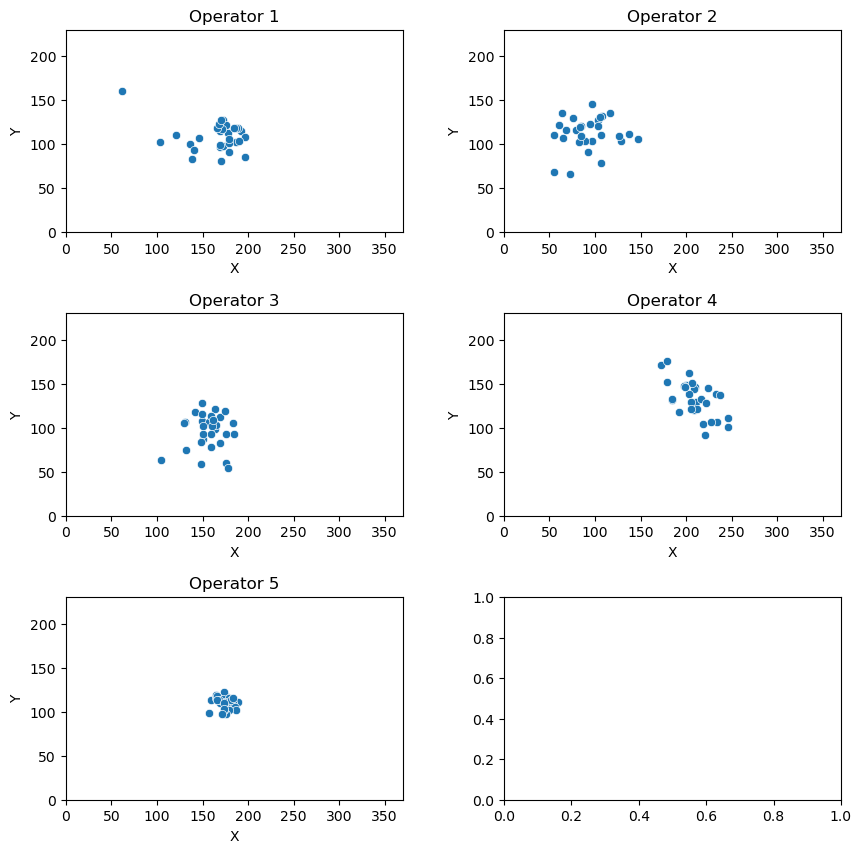

In [3]:
fig, axes = plt.subplots(3, 2)
for i, operator in enumerate(operators):
    sns.scatterplot(data=operator, x="X", y="Y", ax=axes[i//2,i%2])
    axes[i//2,i%2].set_xlim(0, 370)
    axes[i//2,i%2].set_ylim(0, 230)
fig.set_figheight(10)
fig.set_figwidth(10)
axes[0,0].set_title("Operator 1")
axes[0,1].set_title("Operator 2")
axes[1,0].set_title("Operator 3")
axes[1,1].set_title("Operator 4")
axes[2,0].set_title("Operator 5")

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.4,)

In [88]:
def predict_y(data):
    X = data.drop("Y", axis=1)
    y = data["Y"]
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = SVR(kernel="linear")
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
 

    return pred_y

In [99]:
def predict_x(data):
    X = data.drop("X", axis=1)
    y = data["X"]
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = SVR(kernel="rbf")
    model.fit(X_train, y_train)
    pred_x = model.predict(X_test)
    
    
    return pred_x

In [108]:
pred_results = pd.DataFrame()

for x, operator in enumerate(operators):
    x += 1
    pred_results[f"X{x}"] = predict_x(operator)
    pred_results[f"Y{x}"] = predict_y(operator)
    
    
pred_results = pred_results.round(2)
pred_results.index += 1
pred_results
pred_results.to_excel("C:\\Users\\stadn\\Desktop\\_robot_dane_operator\\predictions.xlsx")

In [229]:
X = operator1.drop("X", axis=1)
X = X.drop("Nr obserwacji", axis=1)
y = operator1["X"]
    
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
model = SVR(kernel="rbf")
model.fit(X_train, y_train)
pred_x = model.predict(X_test)
    


In [ ]:
pred_results.to_excel("C:\\Users\\stadn\\Desktop\\_robot_dane_operator\\predictions.xlsx")

In [ ]:
sizes = [0.1, 0.16, 0.33]
preds_for_3 = pd.DataFrame()
preds_for_5 = pd.DataFrame()
preds_for_10 = pd.DataFrame()

for size in sizes:
    x = 1
    for operator in operators:
        if size == 0.1:
            preds_for_3[f"X{x}"] = predict_x(operator, size)
            preds_for_3[f"Y{x}"] = predict_y(operator, size)
            x += 1
            
        elif size == 0.16:
            preds_for_5[f"X{x}"] = predict_x(operator, size)
            preds_for_5[f"Y{x}"] = predict_y(operator, size)
            x += 1
            
        elif size == 0.33:
            preds_for_10[f"X{x}"] = predict_x(operator, size)
            preds_for_10[f"Y{x}"] = predict_y(operator, size)
            x += 1
            
        print([predict_x(operator, size), predict_y(operator, size)])
    



In [5]:
def predict_y(data, regressor):
    X = data.drop("Y", axis=1)
    y = data["Y"]
    
    if regressor == "Polynomial":
        poly_converter = PolynomialFeatures(degree=2, include_bias=False)
        poly_converter.fit(X)
        poly_features = poly_converter.transform(X)

        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
    
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
        model = LinearRegression()
        model.fit(X_train, y_train)
        pred_y = model.predict(X_test)
    
        rmse = np.sqrt(mean_squared_error(y_test, pred_y))
        
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    
    if regressor == "Linear":
        model = LinearRegression()
        model.fit(X_train, y_train)
        pred_y = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, pred_y))
        
    elif regressor == "SVR":
        model = SVR(kernel="linear")
        model.fit(X_train, y_train)
        pred_y = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, pred_y))
        
    return rmse

In [6]:
def predict_x(data, regressor):
    X = data.drop("X", axis=1)
    y = data["X"]
    
    if regressor == "Polynomial":
        poly_converter = PolynomialFeatures(degree=2, include_bias=False)
        poly_converter.fit(X)
        poly_features = poly_converter.transform(X)

        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
    
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
        model = LinearRegression()
        model.fit(X_train, y_train)
        pred_x = model.predict(X_test)
    
        rmse = np.sqrt(mean_squared_error(y_test, pred_x))
        
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    
    if regressor == "Linear":
        model = LinearRegression()
        model.fit(X_train, y_train)
        pred_x = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, pred_x))
        
    elif regressor == "SVR":
        model = SVR(kernel="rbf")
        model.fit(X_train, y_train)
        pred_x = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, pred_x))
       
    return rmse

In [9]:
regressors = ["Polynomial", "Linear", "SVR"]
for regressor in regressors:
    xsum = 0
    ysum = 0
    for operator in operators:
        xsum += predict_x(operator, regressor)
        ysum += predict_y(operator, regressor)
    mean = round((xsum + ysum) / 10, 2)
    x_mean = round(xsum / 5, 2)
    y_mean = round(ysum / 5, 2)
    print(f"Średni błąd jądra {regressor} {mean}")
    print(f"Średni błąd współrzędnej X jądra {regressor} {x_mean}")
    print(f"Średni bład współrzędnej Y jądra {regressor} {y_mean}")

Średni błąd jądra Polynomial 21.13
Średni błąd współrzędnej X jądra Polynomial 27.07
Średni bład współrzędnej Y jądra Polynomial 15.2
Średni błąd jądra Linear 17.94
Średni błąd współrzędnej X jądra Linear 20.46
Średni bład współrzędnej Y jądra Linear 15.41
Średni błąd jądra SVR 14.97
Średni błąd współrzędnej X jądra SVR 15.35
Średni bład współrzędnej Y jądra SVR 14.6


In [77]:
for i, operator in enumerate(operators):
    i += 1
    X = operator.drop("X", axis=1)
    y = operator["X"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = SVR()

    params = {"kernel": ["linear", "poly", "rbf"]}
    grid = GridSearchCV(model, params)
    grid.fit(X, y)

    print(f"Operator {i}: {grid.best_params_}")


Operator 1: {'kernel': 'rbf'}
Operator 2: {'kernel': 'rbf'}
Operator 3: {'kernel': 'rbf'}
Operator 4: {'kernel': 'poly'}
Operator 5: {'kernel': 'rbf'}


In [76]:
for i, operator in enumerate(operators):
    i += 1
    X = operator.drop("Y", axis=1)
    y = operator["Y"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = SVR()

    params = {"kernel": ["linear", "poly", "rbf"]}
    grid = GridSearchCV(model, params)
    grid.fit(X, y)

    print(f"Operator {i}: {grid.best_params_}")


Operator 1: {'kernel': 'rbf'}
Operator 2: {'kernel': 'linear'}
Operator 3: {'kernel': 'linear'}
Operator 4: {'kernel': 'linear'}
Operator 5: {'kernel': 'poly'}


In [78]:
for i, operator in enumerate(operators):
    i += 1
    X = operator.drop("Y", axis=1)
    y = operator["Y"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = SVR(kernel="linear")

    params = {"C": c}
    grid = GridSearchCV(model, params)
    grid.fit(X, y)

    print(f"Operator {i}: {grid.best_params_}")


Operator 1: {'C': 0.1}
Operator 2: {'C': 0.2}
Operator 3: {'C': 0.1}
Operator 4: {'C': 0.5}
Operator 5: {'C': 0.1}


In [79]:
for i, operator in enumerate(operators):
    i += 1
    X = operator.drop("X", axis=1)
    y = operator["X"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = SVR(kernel="rbf")

    params = {"C": c}
    grid = GridSearchCV(model, params)
    grid.fit(X, y)

    print(f"Operator {i}: {grid.best_params_}")


Operator 1: {'C': 0.1}
Operator 2: {'C': 0.1}
Operator 3: {'C': 0.1}
Operator 4: {'C': 4.9}
Operator 5: {'C': 3.2}
